In [1]:
import pandas as pd
import numpy as np
import country_converter as coco

In [2]:
hdi_data = pd.read_excel('World_Suicide_rates.xlsx', 'HDI')
gdi_data = pd.read_excel('World_Suicide_rates.xlsx', 'GDI')
suicide_data = pd.read_excel('World_Suicide_rates.xlsx', 'World_Sucide_rates')
life_expectancy = pd.read_excel('World_Suicide_rates.xlsx', 'LifeExpectancy')
hdi_data = hdi_data[hdi_data['Level'] == 'National']
gdi_data = gdi_data[gdi_data['Level'] == 'National']
gdi_data['Country'] = coco.convert(names = gdi_data['ISO_Code'], to= 'name_short')
gdi_data

,Country,ISO_Code,Level,GDLCODE,Region,1990,1991,1992,1993,1994,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,AFG,National,AFGt,Total,NaN,NaN,NaN,NaN,NaN,...,0.597,0.607,0.617,0.627,0.635,0.640,0.646,0.658,0.662,0.658
9,Albania,ALB,National,ALBt,Total,NaN,NaN,NaN,NaN,NaN,...,0.962,0.956,0.972,0.966,0.964,0.969,0.964,0.964,0.970,0.966
22,Algeria,DZA,National,DZAt,Total,NaN,NaN,NaN,NaN,NaN,...,0.830,0.834,0.835,0.840,0.835,0.855,0.854,0.860,0.859,0.857
30,Angola,AGO,National,AGOt,Total,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.839,0.838,0.903,0.901,0.901,0.901
49,Argentina,ARG,National,ARGt,Total,NaN,NaN,NaN,NaN,NaN,...,0.993,0.993,0.992,0.994,0.992,0.993,0.994,0.993,0.992,0.994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1818,Venezuela,VEN,National,VENt,Total,NaN,NaN,NaN,NaN,NaN,...,1.022,1.023,1.024,1.023,1.024,1.021,1.021,1.018,1.015,1.010
1843,Vietnam,VNM,National,VNMt,Total,NaN,NaN,NaN,NaN,NaN,...,0.981,0.993,0.998,0.999,1.004,1.005,1.003,0.999,0.998,0.998
1850,Yemen,YEM,National,YEMt,Total,NaN,NaN,NaN,NaN,NaN,...,0.672,0.655,0.645,0.616,0.587,0.545,0.515,0.489,0.483,0.490
1859,Zambia,ZMB,National,ZMBt,Total,NaN,NaN,NaN,NaN,NaN,...,0.916,0.921,0.926,0.927,0.934,0.936,0.941,0.977,0.979,0.959


In [3]:
hdi_data['Country'] = coco.convert(names = hdi_data['ISO_Code'], to= 'name_short')
hdi_data['Country'] = coco.convert(names = hdi_data['Country'], to= 'name_short')
hdi_data

XKO not found in ISO3
not found not found in regex


,Country,ISO_Code,Level,GDLCODE,Region,1990,1991,1992,1993,1994,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,AFG,National,AFGt,Total,0.302,0.308,0.314,0.312,0.307,...,0.471,0.477,0.490,0.497,0.500,0.499,0.502,0.506,0.509,0.511
9,Albania,ALB,National,ALBt,Total,0.649,0.631,0.615,0.617,0.624,...,0.745,0.764,0.775,0.781,0.787,0.787,0.787,0.790,0.793,0.794
22,Algeria,DZA,National,DZAt,Total,0.573,0.577,0.582,0.586,0.590,...,0.720,0.729,0.728,0.729,0.736,0.739,0.742,0.746,0.747,0.748
30,Andorra,AND,National,ANDt,Total,NaN,NaN,NaN,NaN,NaN,...,0.838,0.837,0.858,0.856,0.863,0.862,0.866,0.863,0.867,0.868
31,Angola,AGO,National,AGOt,Total,NaN,NaN,NaN,NaN,NaN,...,0.517,0.532,0.544,0.556,0.565,0.572,0.578,0.582,0.582,0.582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1907,Venezuela,VEN,National,VENt,Total,0.645,0.654,0.660,0.661,0.661,...,0.758,0.770,0.771,0.777,0.775,0.770,0.759,0.742,0.732,0.711
1932,Vietnam,VNM,National,VNMt,Total,0.483,0.493,0.504,0.513,0.526,...,0.661,0.671,0.677,0.681,0.683,0.689,0.694,0.696,0.700,0.704
1939,Yemen,YEM,National,YEMt,Total,0.400,0.401,0.404,0.407,0.409,...,0.506,0.506,0.505,0.509,0.502,0.484,0.474,0.467,0.468,0.470
1948,Zambia,ZMB,National,ZMBt,Total,0.421,0.417,0.416,0.419,0.414,...,0.527,0.534,0.549,0.557,0.560,0.569,0.572,0.578,0.582,0.585


In [4]:
suicide_data = suicide_data.dropna(axis=1, how='all')
# suicide_data = suicide_data[suicide_data.all(suicide_data['Location type'] == 'Country' and suicide_data['Period type'] == 'Year')]
suicide_data = suicide_data.drop(columns=['IndicatorCode','Indicator', 'ValueType', 'Location type', 'Period type', 'IsLatestYear', 'Dim1 type', 'Language', 'DateModified'])
suicide_data['Location'] = coco.convert(names = suicide_data['SpatialDimValueCode'], to= 'name_short')
m_suicide_data = suicide_data[suicide_data['Dim1'] == 'Male']
f_suicide_data = suicide_data[suicide_data['Dim1'] == 'Female']
bt_suicide_data = suicide_data[suicide_data['Dim1'] == 'Both sexes']
bt_suicide_data

,ParentLocationCode,ParentLocation,SpatialDimValueCode,Location,Period,Dim1,Dim1ValueCode,FactValueNumeric,FactValueNumericLow,FactValueNumericHigh,Value
1,EMR,Eastern Mediterranean,AFG,Afghanistan,2019,Both sexes,BTSX,5.96,3.40,9.91,5.96 [3.4 – 9.91]
4,EMR,Eastern Mediterranean,AFG,Afghanistan,2018,Both sexes,BTSX,5.91,3.38,9.81,5.91 [3.38 – 9.81]
7,EMR,Eastern Mediterranean,AFG,Afghanistan,2017,Both sexes,BTSX,5.95,3.42,9.88,5.95 [3.42 – 9.88]
10,EMR,Eastern Mediterranean,AFG,Afghanistan,2016,Both sexes,BTSX,6.01,3.48,9.93,6.01 [3.48 – 9.93]
13,EMR,Eastern Mediterranean,AFG,Afghanistan,2015,Both sexes,BTSX,5.99,3.48,9.88,5.99 [3.48 – 9.88]
...,...,...,...,...,...,...,...,...,...,...,...
10966,AFR,Africa,ZWE,Zimbabwe,2004,Both sexes,BTSX,21.47,11.41,33.75,21.47 [11.41 – 33.75]
10969,AFR,Africa,ZWE,Zimbabwe,2003,Both sexes,BTSX,20.23,10.69,31.68,20.23 [10.69 – 31.68]
10972,AFR,Africa,ZWE,Zimbabwe,2002,Both sexes,BTSX,20.34,10.74,31.95,20.34 [10.74 – 31.95]
10975,AFR,Africa,ZWE,Zimbabwe,2001,Both sexes,BTSX,19.53,10.23,30.75,19.53 [10.23 – 30.75]


In [5]:
gdi_data = gdi_data.drop(columns=['ISO_Code', 'Level', 'GDLCODE', 'Region'])
gdi_data.index = range(0,len(gdi_data))
gdi_data
gdi_new = gdi_data.melt(id_vars=['Country'], var_name='Year', value_name='GDI')

In [6]:
hdi_data = hdi_data.drop(columns=['ISO_Code', 'Level', 'GDLCODE', 'Region'])
hdi_data.index = range(0,len(hdi_data))
hdi_data

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,0.302,0.308,0.314,0.312,0.307,0.331,0.335,0.340,0.343,...,0.471,0.477,0.490,0.497,0.500,0.499,0.502,0.506,0.509,0.511
1,Albania,0.649,0.631,0.615,0.617,0.624,0.637,0.646,0.645,0.656,...,0.745,0.764,0.775,0.781,0.787,0.787,0.787,0.790,0.793,0.794
2,Algeria,0.573,0.577,0.582,0.586,0.590,0.594,0.603,0.611,0.620,...,0.720,0.729,0.728,0.729,0.736,0.739,0.742,0.746,0.747,0.748
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.838,0.837,0.858,0.856,0.863,0.862,0.866,0.863,0.867,0.868
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.517,0.532,0.544,0.556,0.565,0.572,0.578,0.582,0.582,0.582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,Venezuela,0.645,0.654,0.660,0.661,0.661,0.666,0.668,0.670,0.672,...,0.758,0.770,0.771,0.777,0.775,0.770,0.759,0.742,0.732,0.711
182,Vietnam,0.483,0.493,0.504,0.513,0.526,0.536,0.548,0.546,0.568,...,0.661,0.671,0.677,0.681,0.683,0.689,0.694,0.696,0.700,0.704
183,Yemen,0.400,0.401,0.404,0.407,0.409,0.415,0.422,0.426,0.432,...,0.506,0.506,0.505,0.509,0.502,0.484,0.474,0.467,0.468,0.470
184,Zambia,0.421,0.417,0.416,0.419,0.414,0.415,0.415,0.416,0.415,...,0.527,0.534,0.549,0.557,0.560,0.569,0.572,0.578,0.582,0.585


In [7]:
hdi_new = hdi_data.melt(id_vars=['Country'], var_name='Year', value_name='HDI')
hdi_new

,Country,Year,HDI
0,Afghanistan,1990,0.302
1,Albania,1990,0.649
2,Algeria,1990,0.573
3,Andorra,1990,NaN
4,Angola,1990,NaN
...,...,...,...
5575,Venezuela,2019,0.711
5576,Vietnam,2019,0.704
5577,Yemen,2019,0.470
5578,Zambia,2019,0.585


In [8]:
life_expectancy = life_expectancy[life_expectancy['Level'] == 'National']
life_expectancy['Country'] = coco.convert(names = life_expectancy['ISO_Code'], to= 'name_short')
life_expectancy = life_expectancy.drop(columns=['ISO_Code', 'Level', 'GDLCODE', 'Region'])
new_lifeExp = life_expectancy.melt(id_vars=['Country'], var_name='Year', value_name='Life Expectancy')



XKO not found in ISO3


In [9]:
new_lifeExp

,Country,Year,Life Expectancy
0,Afghanistan,1990,50.3
1,Albania,1990,71.8
2,Algeria,1990,66.9
3,Andorra,1990,NaN
4,Angola,1990,NaN
...,...,...,...
5575,Venezuela,2019,72.1
5576,Vietnam,2019,75.4
5577,Yemen,2019,66.1
5578,Zambia,2019,63.9


In [10]:
combined_indices = pd.merge(hdi_new, gdi_new, on=['Country', 'Year'], how='outer')
combined_indices = pd.merge(combined_indices, new_lifeExp, on=['Country', 'Year'], how='outer')
combined_indices

,Country,Year,HDI,GDI,Life Expectancy
0,Afghanistan,1990,0.302,NaN,50.3
1,Albania,1990,0.649,NaN,71.8
2,Algeria,1990,0.573,NaN,66.9
3,Andorra,1990,NaN,NaN,NaN
4,Angola,1990,NaN,NaN,NaN
...,...,...,...,...,...
5575,Venezuela,2019,0.711,1.010,72.1
5576,Vietnam,2019,0.704,0.998,75.4
5577,Yemen,2019,0.470,0.490,66.1
5578,Zambia,2019,0.585,0.959,63.9


In [11]:
combined_indices.to_excel('IndicesWithLifeExpectancy.xlsx')

In [27]:
bt_suicide_data = bt_suicide_data.rename(columns={'Period': 'Year', 'Location' : 'Country'})
all_values = pd.merge(bt_suicide_data, combined_indices, on=['Country', 'Year'], how='outer')
all_values = all_values[all_values['SpatialDimValueCode'].notna()]
all_values

C:\Users\jt271\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\reshape\merge.py:916: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  key_col = Index(lvals).where(~mask_left, rvals)


,ParentLocationCode,ParentLocation,SpatialDimValueCode,Country,Year,Dim1,Dim1ValueCode,FactValueNumeric,FactValueNumericLow,FactValueNumericHigh,Value,HDI,GDI,Life Expectancy
0,EMR,Eastern Mediterranean,AFG,Afghanistan,2019.0,Both sexes,BTSX,5.96,3.40,9.91,5.96 [3.4 – 9.91],0.511,0.658,64.8
1,EMR,Eastern Mediterranean,AFG,Afghanistan,2018.0,Both sexes,BTSX,5.91,3.38,9.81,5.91 [3.38 – 9.81],0.509,0.662,64.5
2,EMR,Eastern Mediterranean,AFG,Afghanistan,2017.0,Both sexes,BTSX,5.95,3.42,9.88,5.95 [3.42 – 9.88],0.506,0.658,64.1
3,EMR,Eastern Mediterranean,AFG,Afghanistan,2016.0,Both sexes,BTSX,6.01,3.48,9.93,6.01 [3.48 – 9.93],0.502,0.646,63.8
4,EMR,Eastern Mediterranean,AFG,Afghanistan,2015.0,Both sexes,BTSX,5.99,3.48,9.88,5.99 [3.48 – 9.88],0.499,0.640,63.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3655,AFR,Africa,ZWE,Zimbabwe,2004.0,Both sexes,BTSX,21.47,11.41,33.75,21.47 [11.41 – 33.75],0.411,0.895,43.1
3656,AFR,Africa,ZWE,Zimbabwe,2003.0,Both sexes,BTSX,20.23,10.69,31.68,20.23 [10.69 – 31.68],0.414,0.894,43.2
3657,AFR,Africa,ZWE,Zimbabwe,2002.0,Both sexes,BTSX,20.34,10.74,31.95,20.34 [10.74 – 31.95],0.423,0.892,43.5
3658,AFR,Africa,ZWE,Zimbabwe,2001.0,Both sexes,BTSX,19.53,10.23,30.75,19.53 [10.23 – 30.75],0.431,0.891,44.0


In [28]:
all_values.to_excel('All_data.xlsx')

In [32]:
all_values=all_values.drop(columns=['Dim1', 'Dim1ValueCode'])
#Average and Standard deviation of values grouped by countries
groups = all_values.groupby(['Country'], as_index = False)
summ_vals = groups['FactValueNumeric'].mean()
summ_vals['GDI_Mean'] = groups['GDI'].mean()['GDI']
summ_vals['HDI_Mean'] = groups['HDI'].mean()['HDI']
summ_vals['GDI_var'] = groups['GDI'].var()['GDI']
summ_vals['HDI_var'] = groups['HDI'].var()['HDI']
# summ_vals.columns = ['ParentLocation', 'Country', 'SuicideRate']
summ_vals = summ_vals.fillna(0)
summ_vals[170:180]

,Country,FactValueNumeric,GDI_Mean,HDI_Mean,GDI_var,HDI_var
170,Uganda,15.6785,0.873800,0.482700,0.000078,0.001993
171,Ukraine,23.2900,1.001800,0.749400,0.000028,0.000551
172,United Arab Emirates,6.3105,0.937667,0.829450,0.000140,0.001060
173,United Kingdom,7.2820,0.970650,0.905950,0.000031,0.000315
174,United States,11.8875,0.993100,0.910050,0.000010,0.000182
175,Uruguay,15.5135,1.008150,0.780150,0.000029,0.000653
176,Uzbekistan,9.4800,0.938850,0.663600,0.000009,0.001558
177,Vanuatu,21.8535,0.000000,0.592133,0.000000,0.000086
178,Venezuela,3.8425,1.008550,0.736250,0.000199,0.001096
179,Vietnam,7.2855,0.984750,0.653300,0.000242,0.001443


In [36]:
all_values['FactValueNumeric'] = all_values['FactValueNumeric'].fillna(all_values.groupby('Country')['FactValueNumeric'].transform('mean'))
all_values['GDI'] = all_values['GDI'].fillna(all_values.groupby('Country')['GDI'].transform('mean'))
all_values['HDI'] = all_values['HDI'].fillna(all_values.groupby('Country')['HDI'].transform('mean'))
all_values = all_values.fillna(0)
all_values.sort_values('GDI')

,ParentLocationCode,ParentLocation,SpatialDimValueCode,Country,Year,FactValueNumeric,FactValueNumericLow,FactValueNumericHigh,Value,HDI,GDI,Life Expectancy
940,EMR,Eastern Mediterranean,DJI,Djibouti,2019.0,11.95,5.90,21.36,11.95 [5.9 – 21.36],0.524,0.000,67.1
2148,WPR,Western Pacific,FSM,"Micronesia, Fed. Sts.",2011.0,27.52,14.41,42.35,27.52 [14.41 – 42.35],0.604,0.000,66.6
2147,WPR,Western Pacific,FSM,"Micronesia, Fed. Sts.",2012.0,27.58,13.73,42.87,27.58 [13.73 – 42.87],0.604,0.000,66.8
2146,WPR,Western Pacific,FSM,"Micronesia, Fed. Sts.",2013.0,27.40,12.73,43.01,27.4 [12.73 – 43.01],0.605,0.000,67.0
2145,WPR,Western Pacific,FSM,"Micronesia, Fed. Sts.",2014.0,27.41,12.37,43.35,27.41 [12.37 – 43.35],0.605,0.000,67.2
...,...,...,...,...,...,...,...,...,...,...,...,...
1093,EUR,Europe,EST,Estonia,2006.0,16.82,14.06,19.93,16.82 [14.06 – 19.93],0.840,1.037,73.1
1096,EUR,Europe,EST,Estonia,2003.0,22.32,18.90,26.22,22.32 [18.9 – 26.22],0.812,1.037,71.7
2694,EUR,Europe,RUS,Russia,2005.0,43.56,41.06,45.40,43.56 [41.06 – 45.4],0.754,1.038,65.8
1095,EUR,Europe,EST,Estonia,2004.0,23.15,19.58,27.16,23.15 [19.58 – 27.16],0.821,1.038,72.2


In [51]:
continent_group = all_values.groupby(['ParentLocation', 'Year'], as_index=False)
continent_values = continent_group['HDI'].mean()
continent_values['GDI'] = continent_group['GDI'].mean()['GDI']
continent_values['SuicideRates'] = continent_group['FactValueNumeric'].mean()['FactValueNumeric']
continent_values

,ParentLocation,Year,HDI,GDI,SuicideRates
0,Africa,2000.0,0.423480,0.776869,17.838511
1,Africa,2001.0,0.427842,0.778805,17.347872
2,Africa,2002.0,0.431799,0.780720,17.164255
3,Africa,2003.0,0.434669,0.782699,16.953617
4,Africa,2004.0,0.441477,0.784613,16.838298
...,...,...,...,...,...
115,Western Pacific,2015.0,0.732333,0.731238,12.164286
116,Western Pacific,2016.0,0.734667,0.731667,12.027619
117,Western Pacific,2017.0,0.736762,0.731476,12.039048
118,Western Pacific,2018.0,0.738524,0.732429,11.948095


In [50]:
import plotly_express as px
px.scatter(continent_values,x = 'SuicideRates', y = 'HDI',color='ParentLocation',
           size='HDI',animation_frame='Year', animation_group='ParentLocation',range_x = [0,20],
          range_y = [0,1],text='ParentLocation')

In [16]:
suicide_data = suicide_data.drop(columns='Dim1ValueCode')
suicide_data.to_excel('Suicide_Data.xlsx')

In [17]:
all_nonans = all_values.dropna(how='any')
all_nonans

,ParentLocationCode,ParentLocation,SpatialDimValueCode,Country,Year,Dim1,Dim1ValueCode,FactValueNumeric,FactValueNumericLow,FactValueNumericHigh,Value,HDI,GDI,Life Expectancy
0,EMR,Eastern Mediterranean,AFG,Afghanistan,2019.0,Both sexes,BTSX,5.96,3.40,9.91,5.96 [3.4 – 9.91],0.511,0.658,64.8
1,EMR,Eastern Mediterranean,AFG,Afghanistan,2018.0,Both sexes,BTSX,5.91,3.38,9.81,5.91 [3.38 – 9.81],0.509,0.662,64.5
2,EMR,Eastern Mediterranean,AFG,Afghanistan,2017.0,Both sexes,BTSX,5.95,3.42,9.88,5.95 [3.42 – 9.88],0.506,0.658,64.1
3,EMR,Eastern Mediterranean,AFG,Afghanistan,2016.0,Both sexes,BTSX,6.01,3.48,9.93,6.01 [3.48 – 9.93],0.502,0.646,63.8
4,EMR,Eastern Mediterranean,AFG,Afghanistan,2015.0,Both sexes,BTSX,5.99,3.48,9.88,5.99 [3.48 – 9.88],0.499,0.640,63.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3655,AFR,Africa,ZWE,Zimbabwe,2004.0,Both sexes,BTSX,21.47,11.41,33.75,21.47 [11.41 – 33.75],0.411,0.895,43.1
3656,AFR,Africa,ZWE,Zimbabwe,2003.0,Both sexes,BTSX,20.23,10.69,31.68,20.23 [10.69 – 31.68],0.414,0.894,43.2
3657,AFR,Africa,ZWE,Zimbabwe,2002.0,Both sexes,BTSX,20.34,10.74,31.95,20.34 [10.74 – 31.95],0.423,0.892,43.5
3658,AFR,Africa,ZWE,Zimbabwe,2001.0,Both sexes,BTSX,19.53,10.23,30.75,19.53 [10.23 – 30.75],0.431,0.891,44.0


In [18]:
rm_nans = combined_indices.dropna(how='any')
rm_nans

,Country,Year,HDI,GDI,Life Expectancy
1860,Afghanistan,2000,0.352,0.325,55.8
1861,Albania,2000,0.672,0.935,74.0
1862,Algeria,2000,0.637,0.779,70.6
1866,Argentina,2000,0.782,0.984,73.6
1867,Armenia,2000,0.669,0.942,71.4
...,...,...,...,...,...
5575,Venezuela,2019,0.711,1.010,72.1
5576,Vietnam,2019,0.704,0.998,75.4
5577,Yemen,2019,0.470,0.490,66.1
5578,Zambia,2019,0.585,0.959,63.9


In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
regr = LinearRegression()
X = np.array(rm_nans[['GDI', 'Life Expectancy']])
y = np.array(rm_nans['HDI'])
normalized_X=(X-X.mean())/X.std()
normalized_y=(y-y.mean())/y.std()
regr.fit(normalized_X,y)
print(regr.coef_)
print(regr.intercept_)

[18.66766614  0.47737554]
18.560649280750013


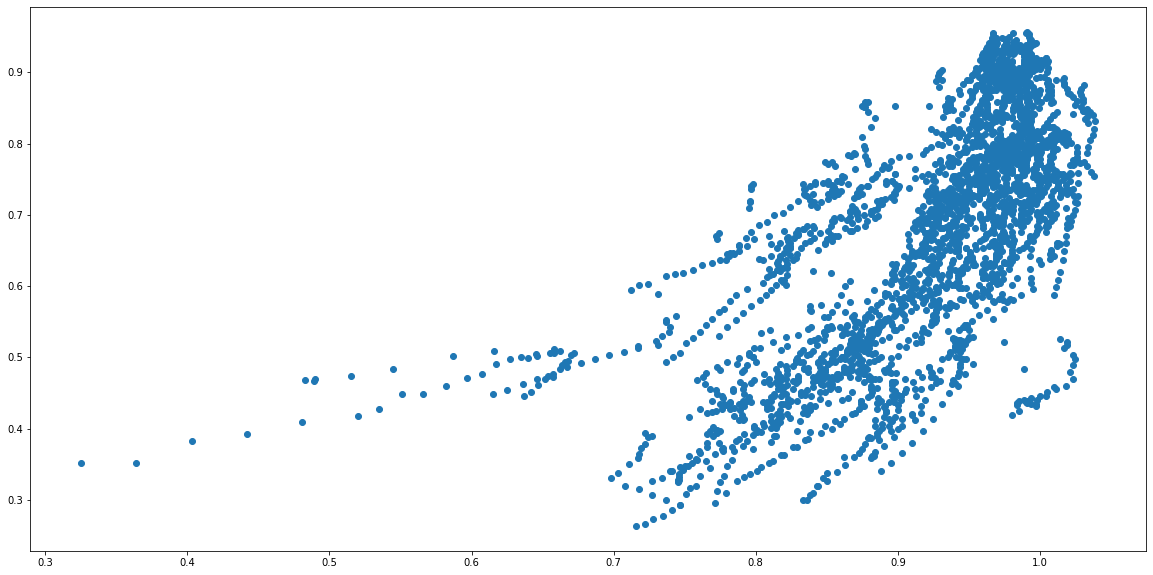

In [21]:
from matplotlib import pyplot as plt
regr_plot = plt.figure(0,figsize=(20,10))
plt.scatter(X[:,0], y)
# plt.plot(normalized_X[:,0], regr.predict(normalized_X))
plt.show()

In [22]:
regr2 = LinearRegression()
y_sr = np.array(all_nonans['FactValueNumeric'])
all_nonans['HDI'] = (all_nonans['HDI'] - all_nonans['HDI'].mean())/all_nonans['HDI'].std()
all_nonans['GDI'] = (all_nonans['GDI'] - all_nonans['GDI'].mean())/all_nonans['GDI'].std()
all_nonans['Life Expectancy'] = (all_nonans['Life Expectancy'] - all_nonans['Life Expectancy'].mean())/all_nonans['Life Expectancy'].std()
x_sr = np.array(all_nonans[['HDI', 'GDI', 'Life Expectancy']])
regr2.fit(x_sr, y_sr)


C:\Users\jt271\AppData\Local\Temp/ipykernel_24880/3583817175.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_nonans['HDI'] = (all_nonans['HDI'] - all_nonans['HDI'].mean())/all_nonans['HDI'].std()
C:\Users\jt271\AppData\Local\Temp/ipykernel_24880/3583817175.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_nonans['GDI'] = (all_nonans['GDI'] - all_nonans['GDI'].mean())/all_nonans['GDI'].std()
C:\Users\jt271\AppData\Local\Temp/ipykernel_24880/3583817175.py:5: SettingWithCopyWarning: 
A value is t

LinearRegression()

In [23]:
regr2.coef_

array([  8.6585003 ,   2.4261802 , -13.34302901])

In [24]:
regr2.intercept_

11.43149375821289

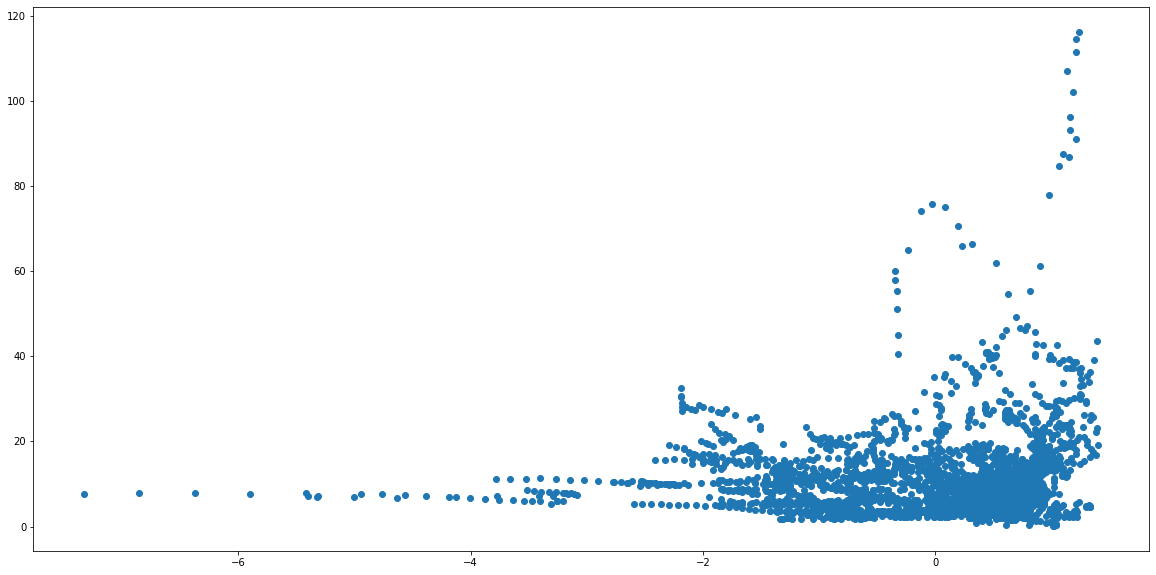

In [25]:
plot2 = plt.figure(1, figsize=(20,10))
plt.scatter(all_nonans['GDI'], all_nonans['FactValueNumeric'])

In [26]:
all_nonans['GDI']

0      -3.256025
1      -3.207104
2      -3.256025
3      -3.402787
4      -3.476168
          ...   
3655   -0.357468
3656   -0.369698
3657   -0.394159
3658   -0.406389
3659   -0.418619
Name: GDI, Length: 3044, dtype: float64